<a href="https://colab.research.google.com/github/ChristophWuersch/satw/blob/main/Fluch_der_Dimension_Olten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/ChristophWuersch/satw/main/ost_logo.png" width="240" align="right"/>
<div style="text-align: left"> <b> satw TecDay </b> <br> Der Fluch der Dimensionalität, 2022 <br> 
<a href="mailto:christoph.wuersch@ost.ch"> Christoph Würsch </a> </div>

# Jupyter Notebooks und Python

- [Jupyter-Notebooks](https://jupyter.org/try-jupyter/retro/notebooks/?path=notebooks/Intro.ipynb) sind eine wunderbare Sache. Mit ihnen lässt sich ein Computer-Programm und dessen Beschreibung direkt in einem Arbeitsblatt verbinden.
- Wir können damit Berechnungen durchführen, Formeln schreiben, Grafiken und Animationen erstellen, Videos einbinden und vieles mehr.
- Ausgeführt wird ein Jupyter-Notebook in einem Browser (z.B. Google Chrome oder Edge).
- Wir werden [Google-Colab](https://colab.research.google.com/) verwenden. Dafür benötigen Sie einen Google-Account. Aber sie brauchen nichts zu installieren.
- Die Programmiersprache, auf der Jupyter basiert ist `Python`.

Generieren wir mal zwei Punkte $P(x,y)$ in einem 2D kartesischen Koordinatensystem.


In [5]:
import numpy as np
from numpy.linalg import norm

P1=np.array([1,4])
P2=np.array([-2,5])

In [6]:
print(P1)

[1 4]


### Um den Abstand zwischen $P_1$ und $P_2$ zu berechnen, verwenden wir den Satz von Pythagoras:

$$ d(P_1,P_2) = \sqrt{(x_2-x_1)^2+(y_2-y_1)^2} = \sqrt{\Delta x^2 + \Delta y^2}$$

Mit `Python` läuft das so:

In [7]:
P2-P1

array([-3,  1])

In [10]:
np.power(P2-P1,2)

array([9, 1], dtype=int32)

In [11]:
np.sqrt(np.power(P2-P1,2).sum())

3.1622776601683795

Einfacher geht es mit der *Norm*:

In [12]:
norm(P2-P1)

3.1622776601683795

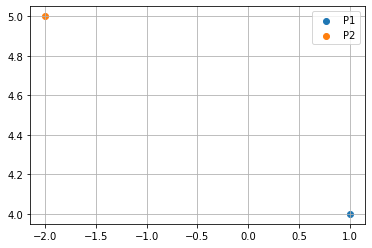

In [38]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(P1[0],P1[1],label='P1')
plt.scatter(P2[0],P2[1],label='P2')
plt.grid(True)
plt.legend()


- Wir können den Abstand auch für 3- oder sogar für n-dimensionale Vektoren definieren. 
- Die Koordinaten von $P_1$ seien $x_i$ jene von $P_2$ heissen $y_i$ für $(i=1\dots n)$.

$$P_1 = \begin{pmatrix} x_1\\x_2 \\ \vdots \\x_n \end{pmatrix}
\qquad
P_2 = \begin{pmatrix} y_1\\y_2 \\ \vdots \\y_n \end{pmatrix}$$

Dann ist der *Euklidische Abstand* gegeben durch:

$$d(P_1,P_2) = \sqrt{\sum_{i=1}^{n} (y_i-x_i)^2}$$

Probieren Sie es aus:

In [44]:
P1=np.array([1,4,-3, 5, 2, 11,-13,22,-7])




# The Curse of Dimensionality

- *Prof. Dr. Christoph Würsch, Institute for Computational Engineering ICE, OST*


Im Bereich des maschinellen Lernens wird der "Fluch der Dimensionalität" zwar häufig genannt, aber viel seltener erklärt. Zumindest nicht im Detail. Man erfährt nur, dass Punkte in hochdimensionalen Räumen weiter voneinander entfernt sind.



## 1. Mittlerer Abstand zweier Punkte im Hyperkubus $\mathcal{H}_n = [0,1]^n$

Wir wollen zeigen, dass mittlere der Abstand zwischen beliebig gewählten Punkten im n-dimensionalen Hyperkubus $\mathcal{H}_n = [0,1]^n$ mit der Dimension des Raums $n$ ansteigt, und falls $n \rightarrow \infty$, sogar Unendlich gross wird.

- Dazu berechnen wir den **durchschnittlichen euklidischen Abstand** $\beta(n)$ von $k$ gleichmässig zufällig ausgewählten Punkten im $n$-dimensionalen Einheitswürfel $\mathcal{H}_n= [0,1]^n$. 
- Nennen wir diesen mittleren Abstand  $\beta(n)$.



### 1.1. Eine analytische obere Schranke für den durchschnittlichen euklidischen Abstand

Ein einfaches Argument **Jensens Ungleichung** liefert eine obere Schranke; wir stellen zunächst fest, dass, wenn $X=(x_1,...,x_n)$ gleichförmig auf $[0,1]^n$ ist, dann sind alle Randwerte $x_i \in [0,1]$ unabhängig und gleichförmig. Dann ist

\begin{aligned}
\beta(n)= \mathbb{E} \left[ |\vec{X} - \vec{Y}|\right] 
& = \mathbb{E} \left[ \left( \sum_{i=1}^n(x_i - y_i)^2 \right)^{1/2} \right] \\ 
& \leq \left( \mathbb{E} \left[ \sum_{i=1}^n(x_i - y_i)^2 \right] \right)^{1/2} 
 = \sqrt{n} \cdot \left( \mathbb{E} [(x_1 - y_1)^2] \right)^{1/2}
 = \sqrt{\frac{n}6}
\end{aligned}

Das liegt daran, dass der **Erwartungswert** (Mittelwert) für den quadrierten Abstand für $n=1$ durch gegeben ist:

\begin{aligned}
\mathbb{E} [\Delta x^2] &= \int \int \left[ p(x)\cdot x - p(x')\cdot x' \right]^2 dx dx' \\
& =\int_0^1 \int_0^1 (x - x')^2 dx dx'\\
& =\int_0^1 \int_0^1 (x^2-2xx' + x'^2) dx dx' =\frac{1}{6}
\end{aligned}

### 1.2 Eine Abschätzung für den mittleren Abstand zweier Punkte im Hyperkubus mit dem Computer

- Mittelwerte lassen sich auch mit der **Monte Carlo (Zufallsmethode)** berechnen. 
- Dafür platzieren wir einfach mal 1000 Punkte z.B. im $\mathcal{H}_2=[0,1]^2$:

<IPython.core.display.Javascript object>


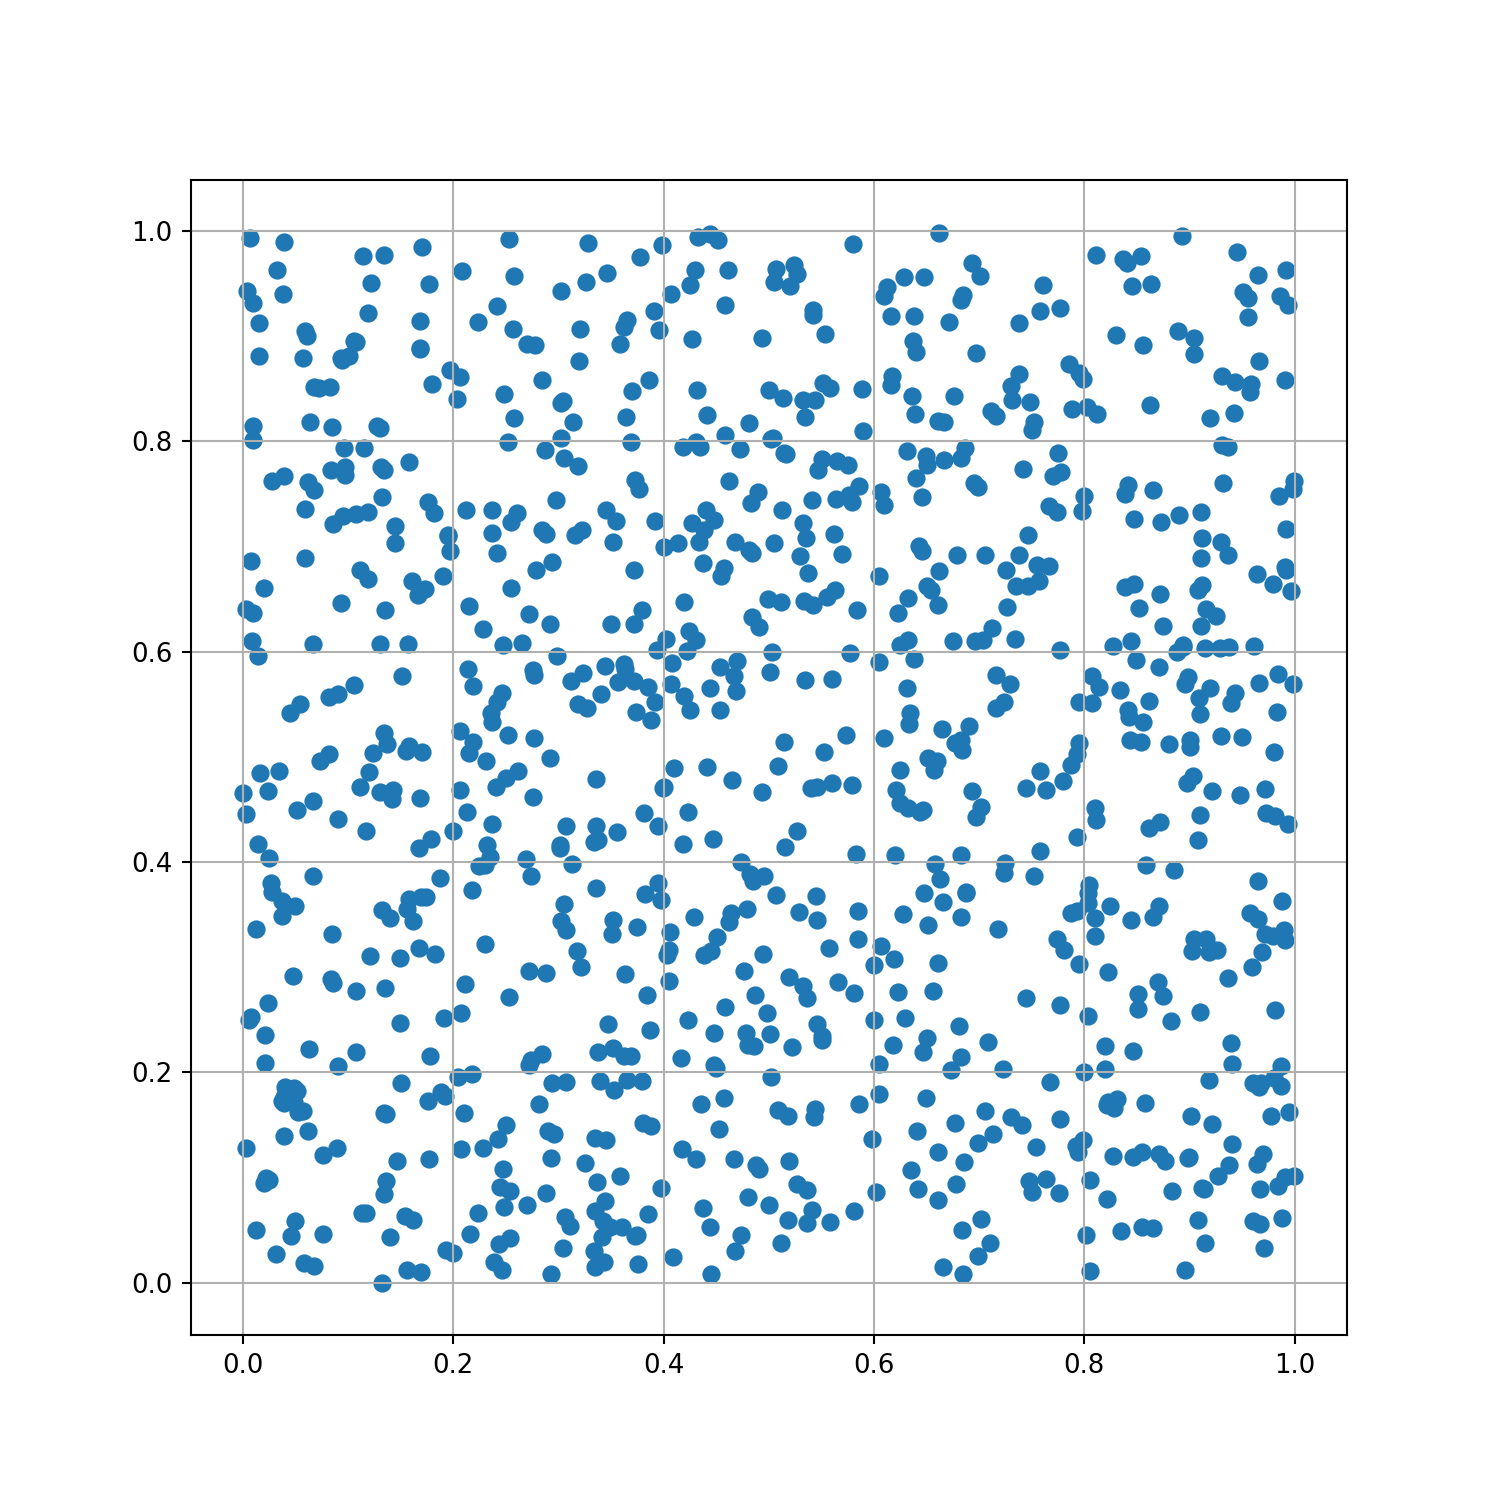

In [19]:
# seed the pseudorandom number generator
import numpy as np
from numpy.random import seed
from numpy.random import rand
import seaborn as sns
import matplotlib.pyplot as plt

d=2       # Dimension d=2
N=1000    #1000 Punkte 

x=rand(np.int32(d),N)
y=rand(np.int32(d),N)

plt.figure(figsize=(8,8))
plt.scatter(x[0],x[1])
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')



In [17]:
x

array([[0.92558352, 0.63918537, 0.83569605, ..., 0.17979907, 0.03110849,
        0.21361499],
       [0.34774053, 0.38249661, 0.41672863, ..., 0.1730419 , 0.43607333,
        0.01316799]])

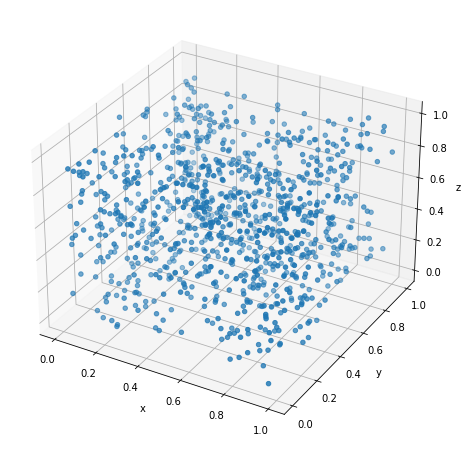

In [20]:
d=3       # Dimension d=2
N=1000    #1000 Punkte 
%matplotlib inline

x=rand(np.int32(d),N)  #Punkt P1
y=rand(np.int32(d),N)  #Punkt P2

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(x[0],x[1],x[2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.gca().set_aspect('auto', adjustable='box')

In [4]:
# Berechnen der Abstände
z=np.sqrt(np.power(x-y,2))
z

array([[0.2403002 , 0.09417703, 0.15533181, ..., 0.2650437 , 0.66854182,
        0.26319377],
       [0.18074791, 0.7837297 , 0.94661169, ..., 0.03355683, 0.10323066,
        0.02058573],
       [0.24928072, 0.73687861, 0.78456706, ..., 0.49796488, 0.55296471,
        0.13372108]])

In [5]:
# Berechnen des Mittelwertes
z.mean()

0.3410157720088285

Nun machen wir dies für verschiedene Dimensionen $d \in [2,200]$ und plotten den mittleren Abstand zweier zufälliger Punkte im Hyperkubus $\mathcal{H}_d$ alle Dimensionen.

Text(0, 0.5, 'Mittlerer Abstand zweier Punkte im Hyperkubus')

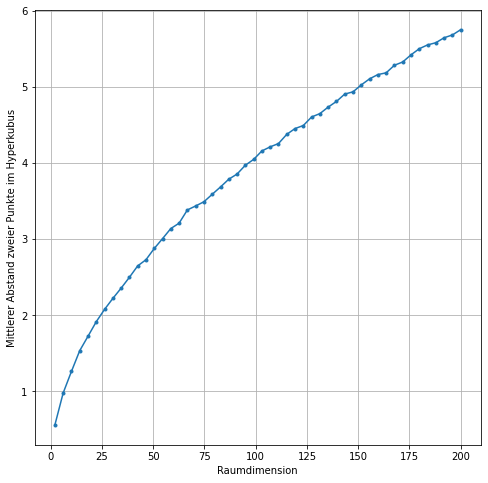

In [21]:
N=100
seed(1)
beta=list()
DimList=np.linspace(2,200)


for d in DimList:
    # seed random number generator
    # generate some random numbers
    x=rand(np.int32(d),N)
    y=rand(np.int32(d),N)
    #print(np.shape(x))
    z=np.power(x-y,2)
    #print(np.shape(z))
    beta.append(np.mean(np.sqrt(np.sum(z,axis=0))))


plt.figure(figsize=(8,8))
plt.plot(DimList,beta,'.-')
plt.grid()
plt.xlabel('Raumdimension')
plt.ylabel('Mittlerer Abstand zweier Punkte im Hyperkubus')
# reset the seed



Wir sehen: der mittlere Abstand zweier beliebiger Punkte im d-dimensionalen Hyperkubus wächst wie $\sqrt{d}$ mit der Dimension des Hyperkubus $\mathcal{H}_d$:

## 1.3 Durchschnittlicher Winkel zwischen zwei Ortsvektoren in $\mathcal{H}_d$

Eine interessante Frage ist, wie sich der durchschnittliche Winkel zwischen zwei Punkten (und dem Ursprung) bei höheren Dimensionen verändert. Angenommen, alle Punkte liegen im Hyperwürfel $[0,1]^n$.

![Winkelberechnung über den Kosinussatz](https://raw.githubusercontent.com/ChristophWuersch/satw/main/d_dimensional_angle.png)

Aufgrund der Symmetrie sollte der mittlere Winkel zwischen zwei beliebigen Ortsvektoren 90° betragen sollte. Dabei spielt es keine Rolle, wie hoch die Dimension ist, denn je höher die Dimension $n$ wird, desto näher sind die Daten an den Achsen konzentriert.

Ein kurzes Experiment bestätigt dies:

In [7]:
from scipy import spatial
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def cosine_dist(p1, p2):
    
    ang = 1 - spatial.distance.cosine(p1, p2)
    if not (-1 <= ang <= 1):
        if ang >= 1:
            return 0
        if ang <= -1:
            return 180
    return np.degrees(np.arccos(ang))


def get_angles(d, num_points=100):
    """Get angles of random points in d-dimensional unit hypercube."""
    points = 2 * np.random.rand(num_points, d) - 1
    angles = []
    for p1 in points:
        for p2 in points:
            angles.append(cosine_dist(p1, p2))
    return angles


    1 dim: 89.8560 avg angle


<Figure size 640x480 with 0 Axes>

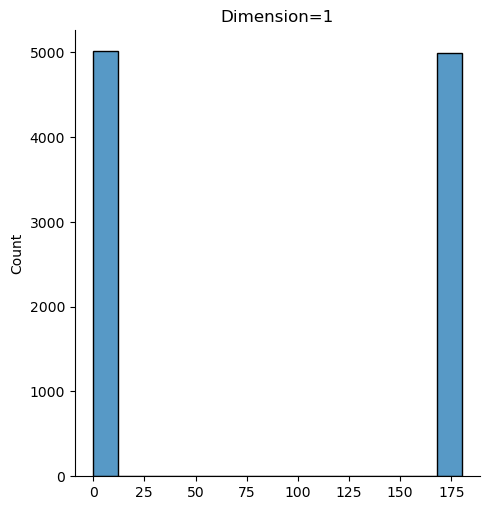

    2 dim: 89.8175 avg angle


<Figure size 640x480 with 0 Axes>

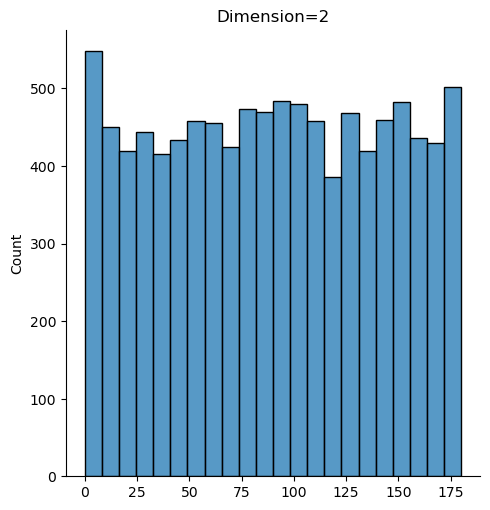

    3 dim: 89.2714 avg angle


<Figure size 640x480 with 0 Axes>

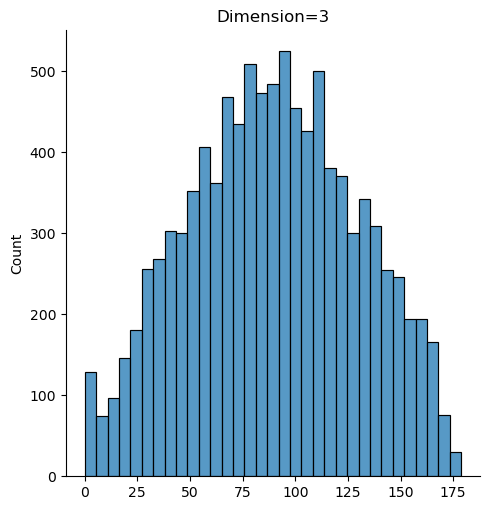

    5 dim: 89.1655 avg angle


<Figure size 640x480 with 0 Axes>

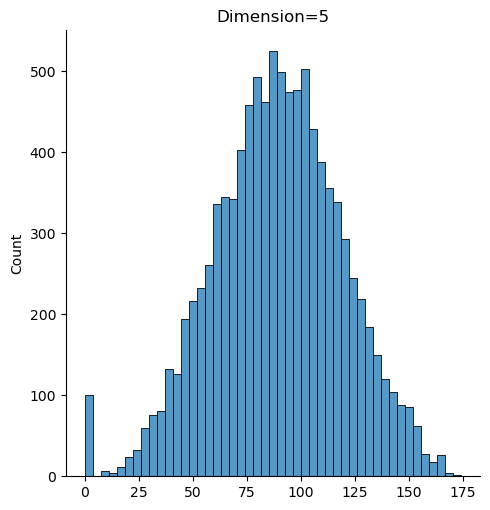

   10 dim: 88.9631 avg angle


<Figure size 640x480 with 0 Axes>

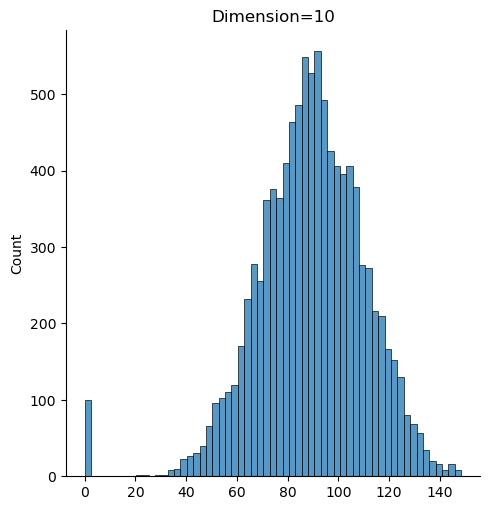

  100 dim: 89.0982 avg angle


<Figure size 640x480 with 0 Axes>

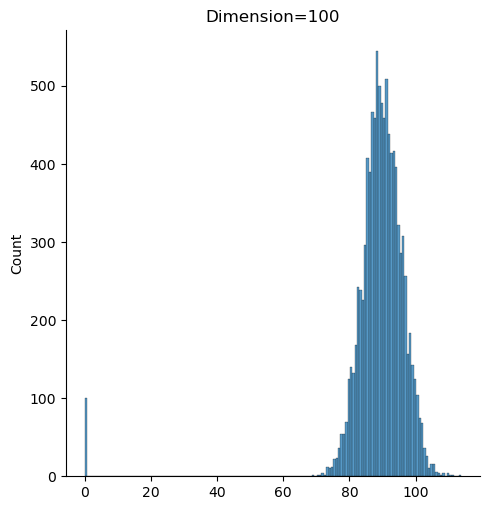

 1000 dim: 89.0784 avg angle


<Figure size 640x480 with 0 Axes>

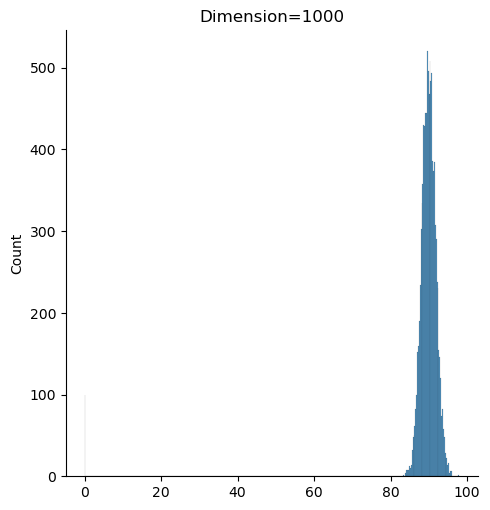

10000 dim: 89.1093 avg angle


<Figure size 640x480 with 0 Axes>

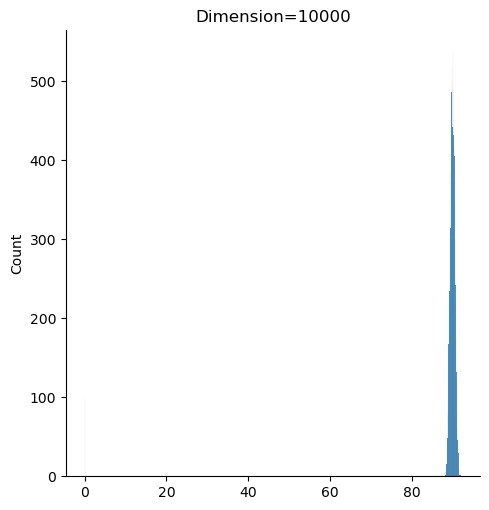

100000 dim: 89.1019 avg angle


<Figure size 640x480 with 0 Axes>

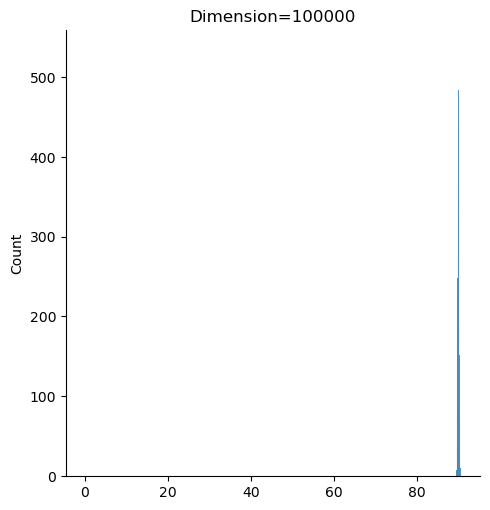

In [10]:
%matplotlib inline
for d in [1, 2, 3, 5, 10, 100, 1000, 10000, 100000]:
    angles = get_angles(d)
    print("{:>5} dim: {:0.4f} avg angle".format(d, sum(angles) / len(angles)))
    plt.figure()
    sns.displot(angles, kde=False, rug=False)
    plt.title('Dimension=%i' % d)
    plt.show()


## "Hochdimensionale Räume gleichen Seeigeln"

Das bedeutet wiederum, dass alle Punkte entlang der Koordinatenachsen konzentiert sind. Wir können uns vorstellen, dass die hohdimensionalen Räume fast aussehen, wie Seeigel, wobei jede Stachel des Seeigels eine Raumrichtung darstellen. Nur entlang dieser Achsen sind die Punkte wirklich dicht.


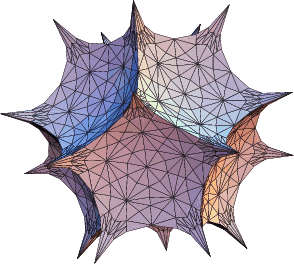

In [7]:
from IPython.display import Image
Image("https://raw.githubusercontent.com/ChristophWuersch/satw/main/hyperbolic_dodecahedron.gif",width=400)

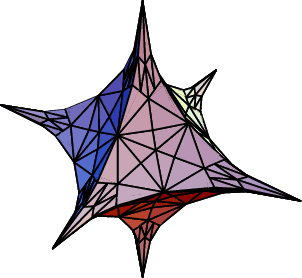

In [8]:
from IPython.display import Image
Image("https://raw.githubusercontent.com/ChristophWuersch/satw/main/hyperbolic_octahedron.gif",width=400)

[The curse of Dimensionality](https://data-science-blog.com/blog/2020/10/08/spiky-cubes-empty-mms-chocolate-curse-of-dimensionality/)